# Machine Learning - Supervised Learning
## Unit 5. Decision & Regression trees
### Lecturer: Tai Le Quy
29.8.2023

## 1. Decision tree

In this tutorial we will demonstrate an example of decision tree model on the Iris dataset.

In [1]:
# %% load packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
#Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class-label']
classnames = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
dataset = pd.read_csv(url, names=names)
dataset.sample(5) # prints a 5 random samples

,sepal-length,sepal-width,petal-length,petal-width,class-label
149,5.9,3.0,5.1,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor


In [3]:
# Dividing data into features and labels
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values

In [5]:
#Label encoding
#As we can see labels are categorical. We need to use LabelEncoder to transform them into numbers. 
#Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
le = LabelEncoder()
Y = le.fit_transform(Y)

In [6]:
#Spliting dataset into training set and test set
#Let's split dataset into training set and test set, to check later on whether or not our 
#classifier works correctly. We split 75% data for training and 25% for test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
#If you don't set a seed, it is different each time.

In [7]:
#Lastly, because features values are in the same order of magnitude, 
#there is no need for feature scaling. Nevertheless in other sercostamses it is 
#extremly important to apply feature scaling before running classification algorithms.
# Fitting clasifier to the Training set

# Call decision tree
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=8, criterion='entropy')

# Fitting the model
clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = clf.predict(X_test)

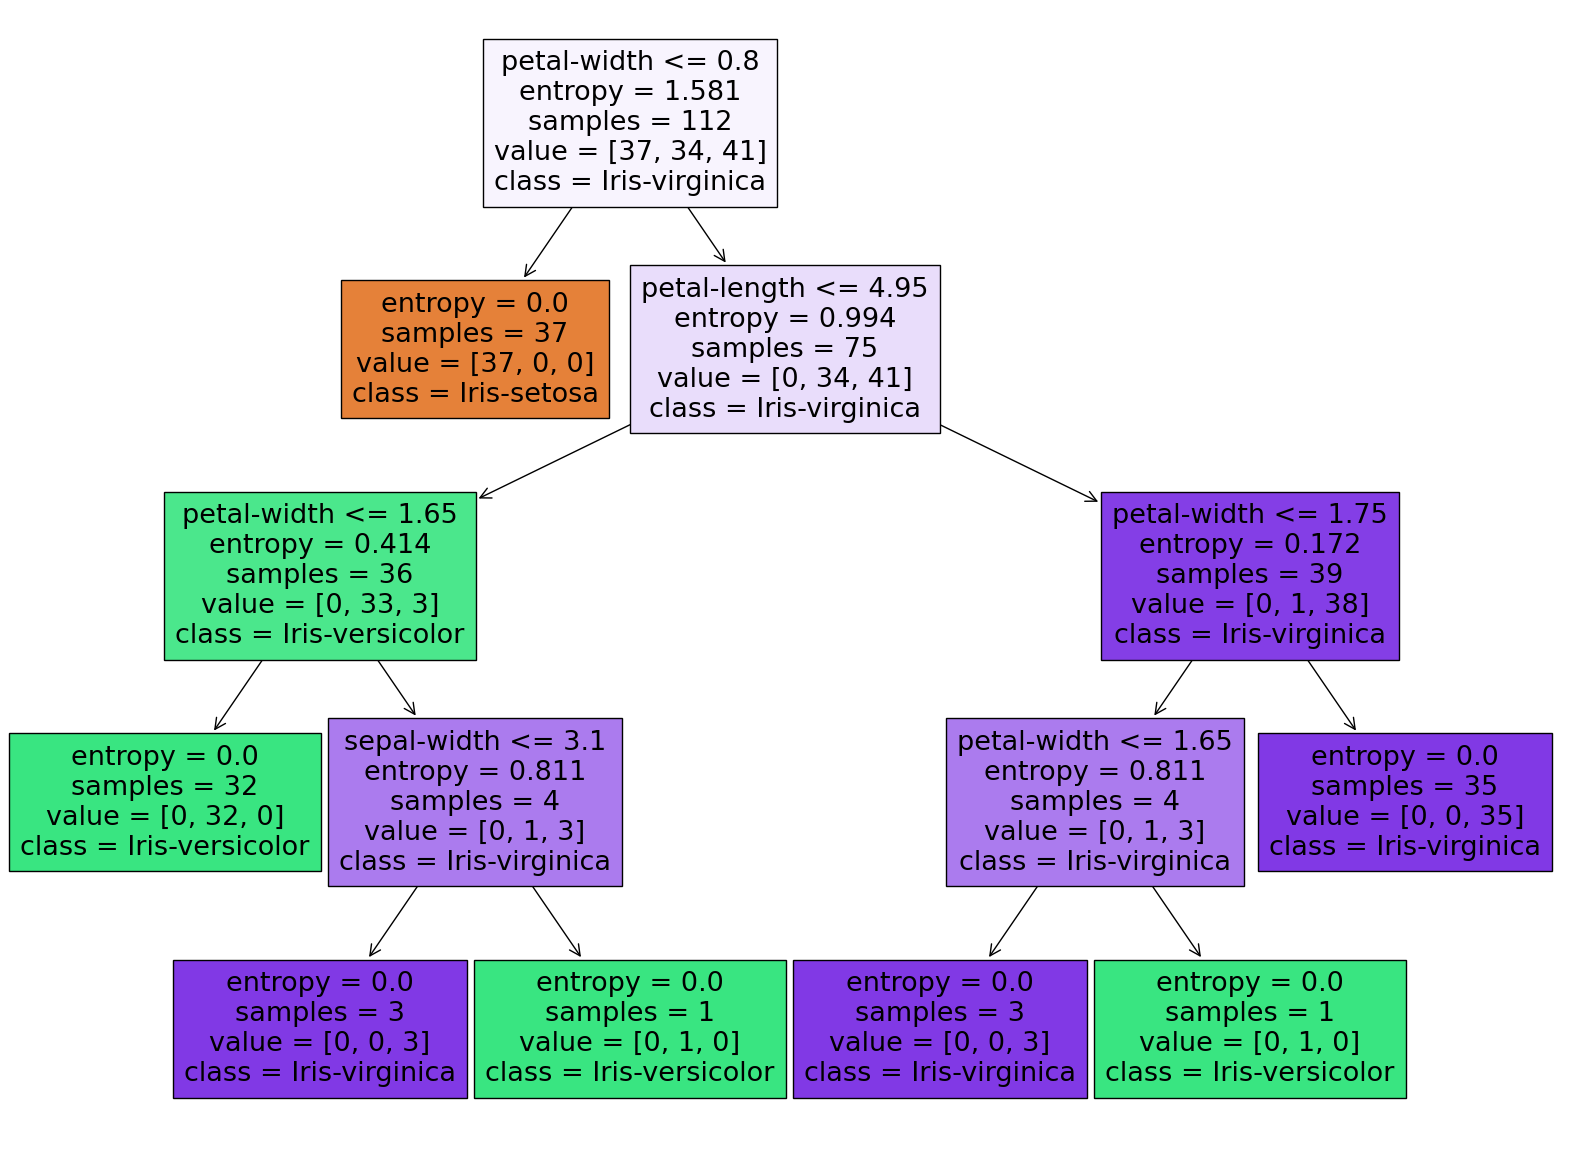

In [8]:
#Plot the decision tree
import matplotlib.pyplot as plt #Library for plot
plt.figure(figsize = (20,15), dpi = 100)
tree.plot_tree(clf,filled=True,feature_names = names,class_names=classnames)
plt.savefig("Iris-decision-tree.pdf",bbox_inches='tight')
plt.show()

In [9]:
#Evaluating predictions
# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [10]:
#Accuracy
print("Accuracy")
print(accuracy_score(Y_test, Y_pred))

Accuracy
0.9736842105263158


In [11]:
#Summary
print("Summary")
print(classification_report(Y_test, Y_pred))

Summary
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Homework
- Apply the decision tree classification with a similar process to forcast whether a customer is 'good' or 'bad' in the German credit dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data). 
- Report the results on accuracy, precision, recall and F-score measures.

## 2. Regression tree

### Example 1

In [12]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [13]:
# Importing the datasets

datasets = pd.read_csv('Position_Salaries.csv')
X = datasets.iloc[:, 1:2].values
Y = datasets.iloc[:, 2].values

In [14]:
datasets

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
# Fitting the Regression model to the dataset

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [16]:
# Predicting a new result with the Decision Tree Regression

Y_Pred = regressor.predict([[6.5],[8.5],[3.5]])
print(Y_Pred)

[150000. 300000.  60000.]


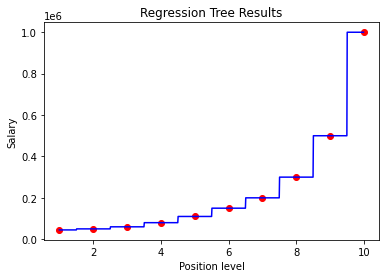

In [31]:
# Visualising the Decision Tree Regression results in higher resolution and smoother curve
X_Grid = np.arange(min(X), max(X), 0.01)
X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.scatter(X,Y, color = 'red')
plt.plot(X_Grid, regressor.predict(X_Grid), color = 'blue')
plt.title('Regression Tree Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

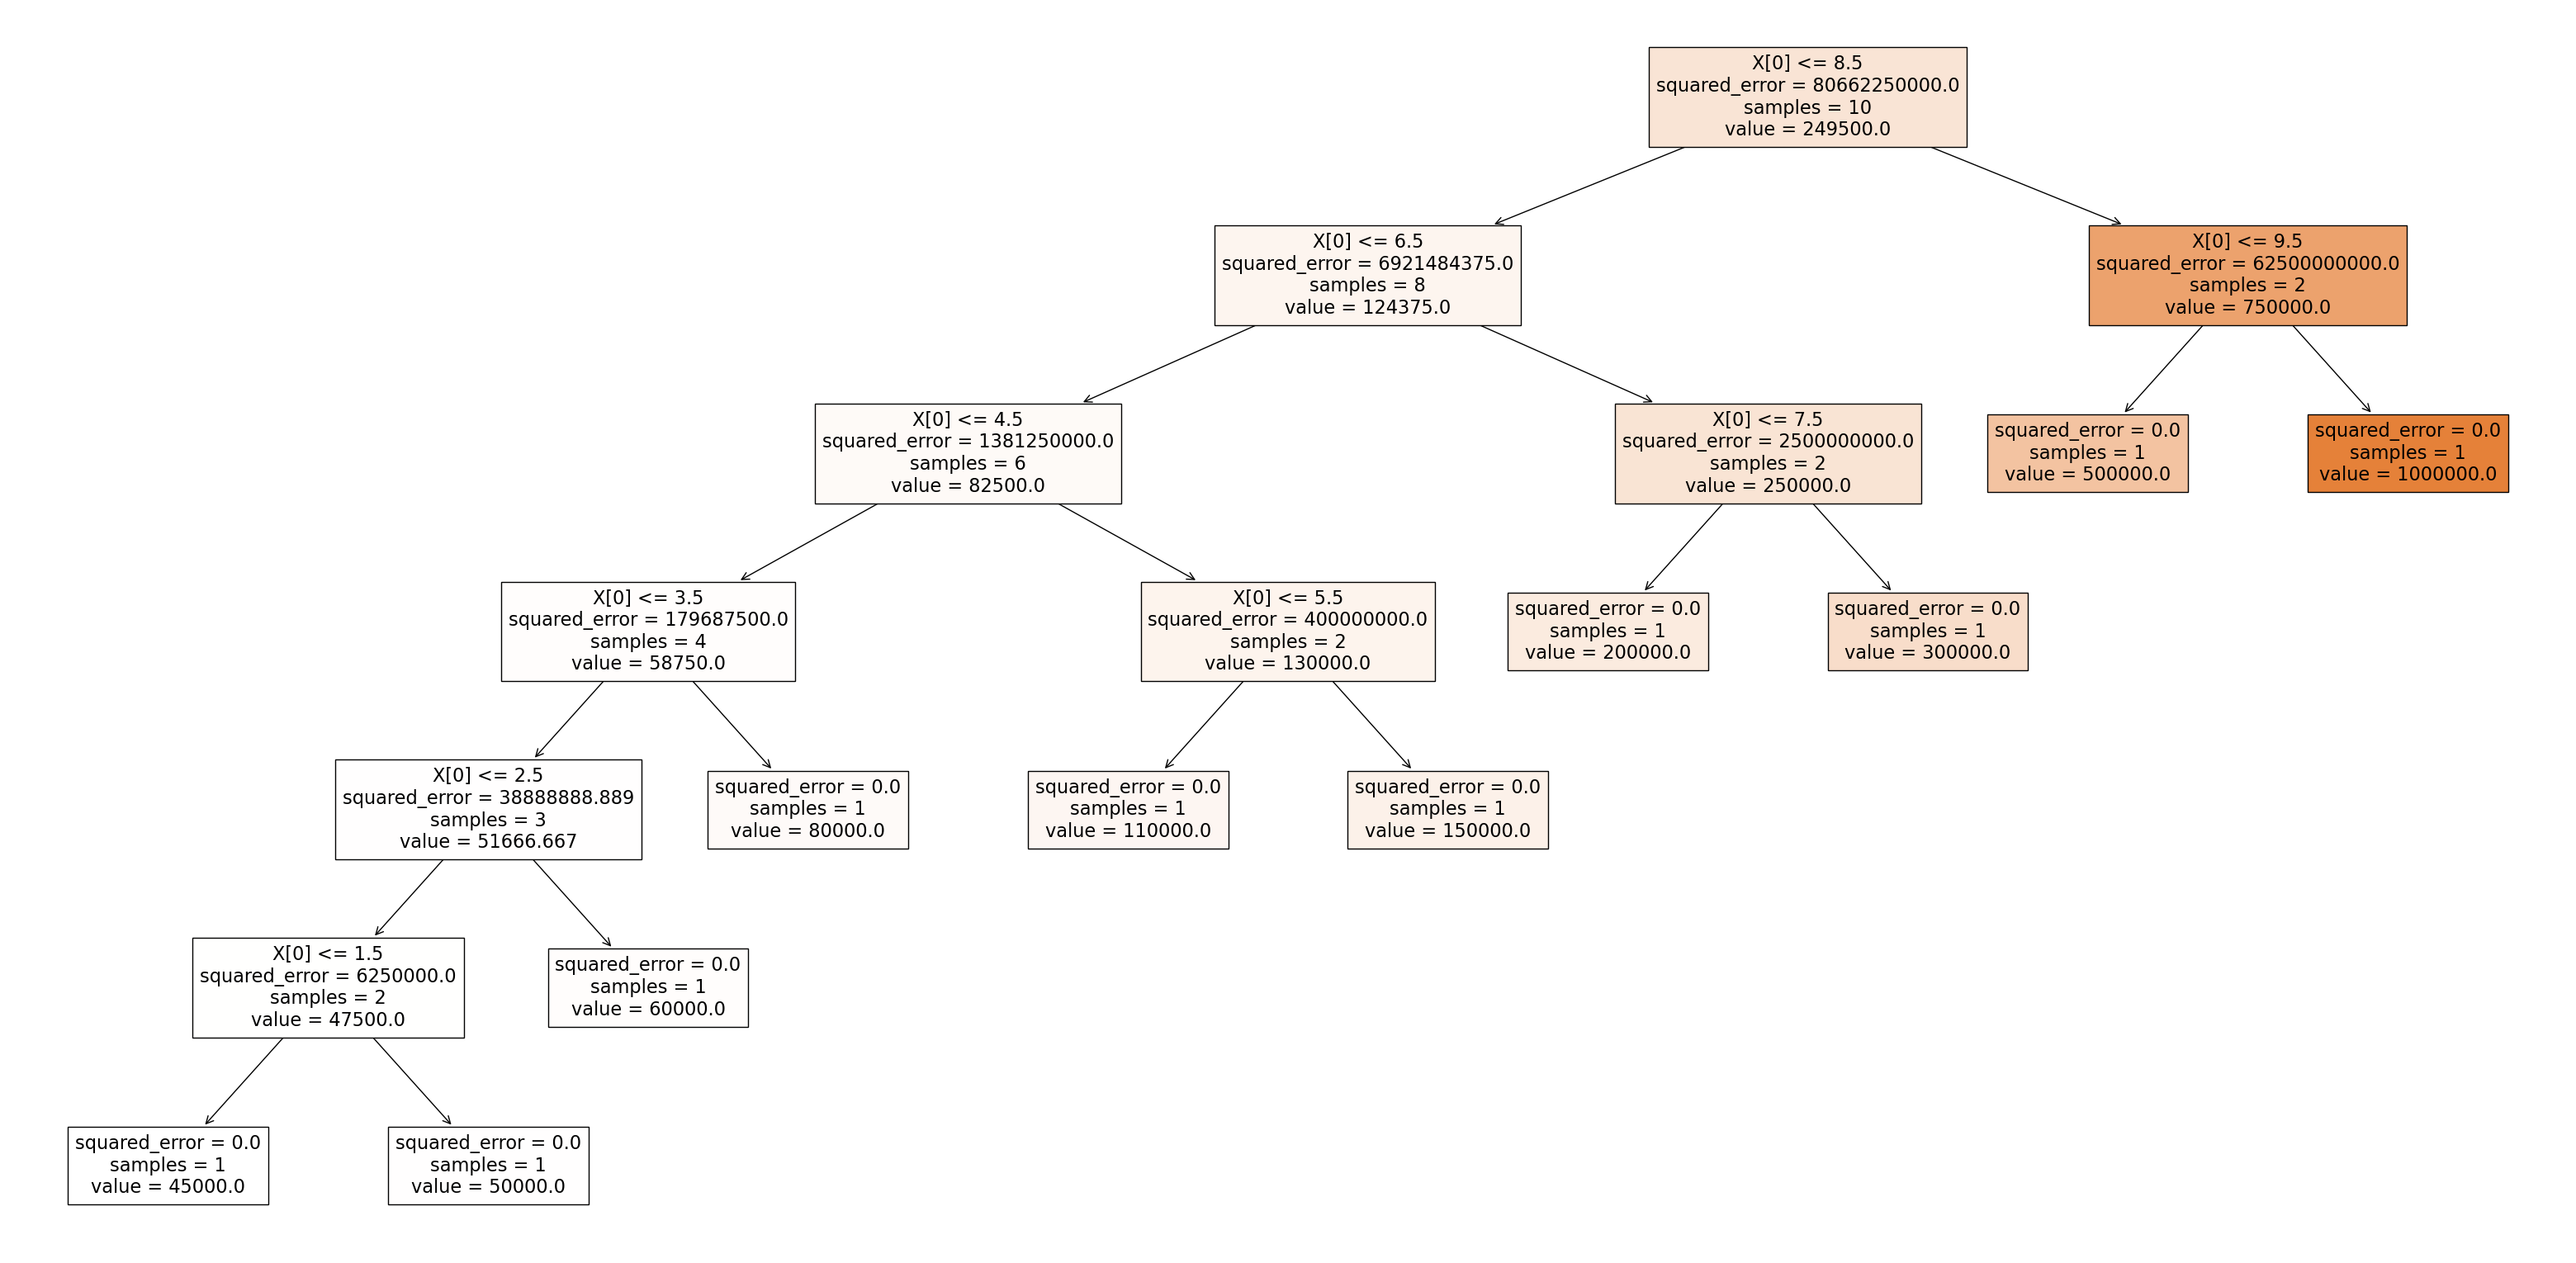

In [57]:
plt.figure(figsize = (40,20), dpi = 100)
tree.plot_tree(regressor,filled=True)
plt.savefig("Salary-regression-tree.pdf",bbox_inches='tight')
plt.show()

### Example 2

-  Predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.
- The dataset is split to 80% train and 20% test.

Source: https://github.com/lnphng/Machine-Learning-with-Tree-Based-Models-in-Python/blob/master/01.%20Classification%20and%20Regression%20Trees.ipynb

In [17]:
# Load the dataset
auto= pd.read_csv('auto.csv')
auto_origin = pd.get_dummies(auto.origin)
auto = pd.concat([auto, auto_origin], axis = 1).drop('origin', axis = 1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']
auto.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [18]:
#Split data into training and test sets
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [19]:
# Import DecisionTreeRegressor from sklearn.tree
#from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=0)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=0)

In [20]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of regression tree: {:.2f}".format(rmse_dt))
print('\nThe smaller the means squared error, the closer are to finding the line of best fit.\
Depending on data, it may be impossible to get a very small value for the mean squared error.\
 => try several equations, and the one that gave the smallest mean squared error would be the line of best fit.')

Test set RMSE of regression tree: 4.27

The smaller the means squared error, the closer are to finding the line of best fit.Depending on data, it may be impossible to get a very small value for the mean squared error. => try several equations, and the one that gave the smallest mean squared error would be the line of best fit.


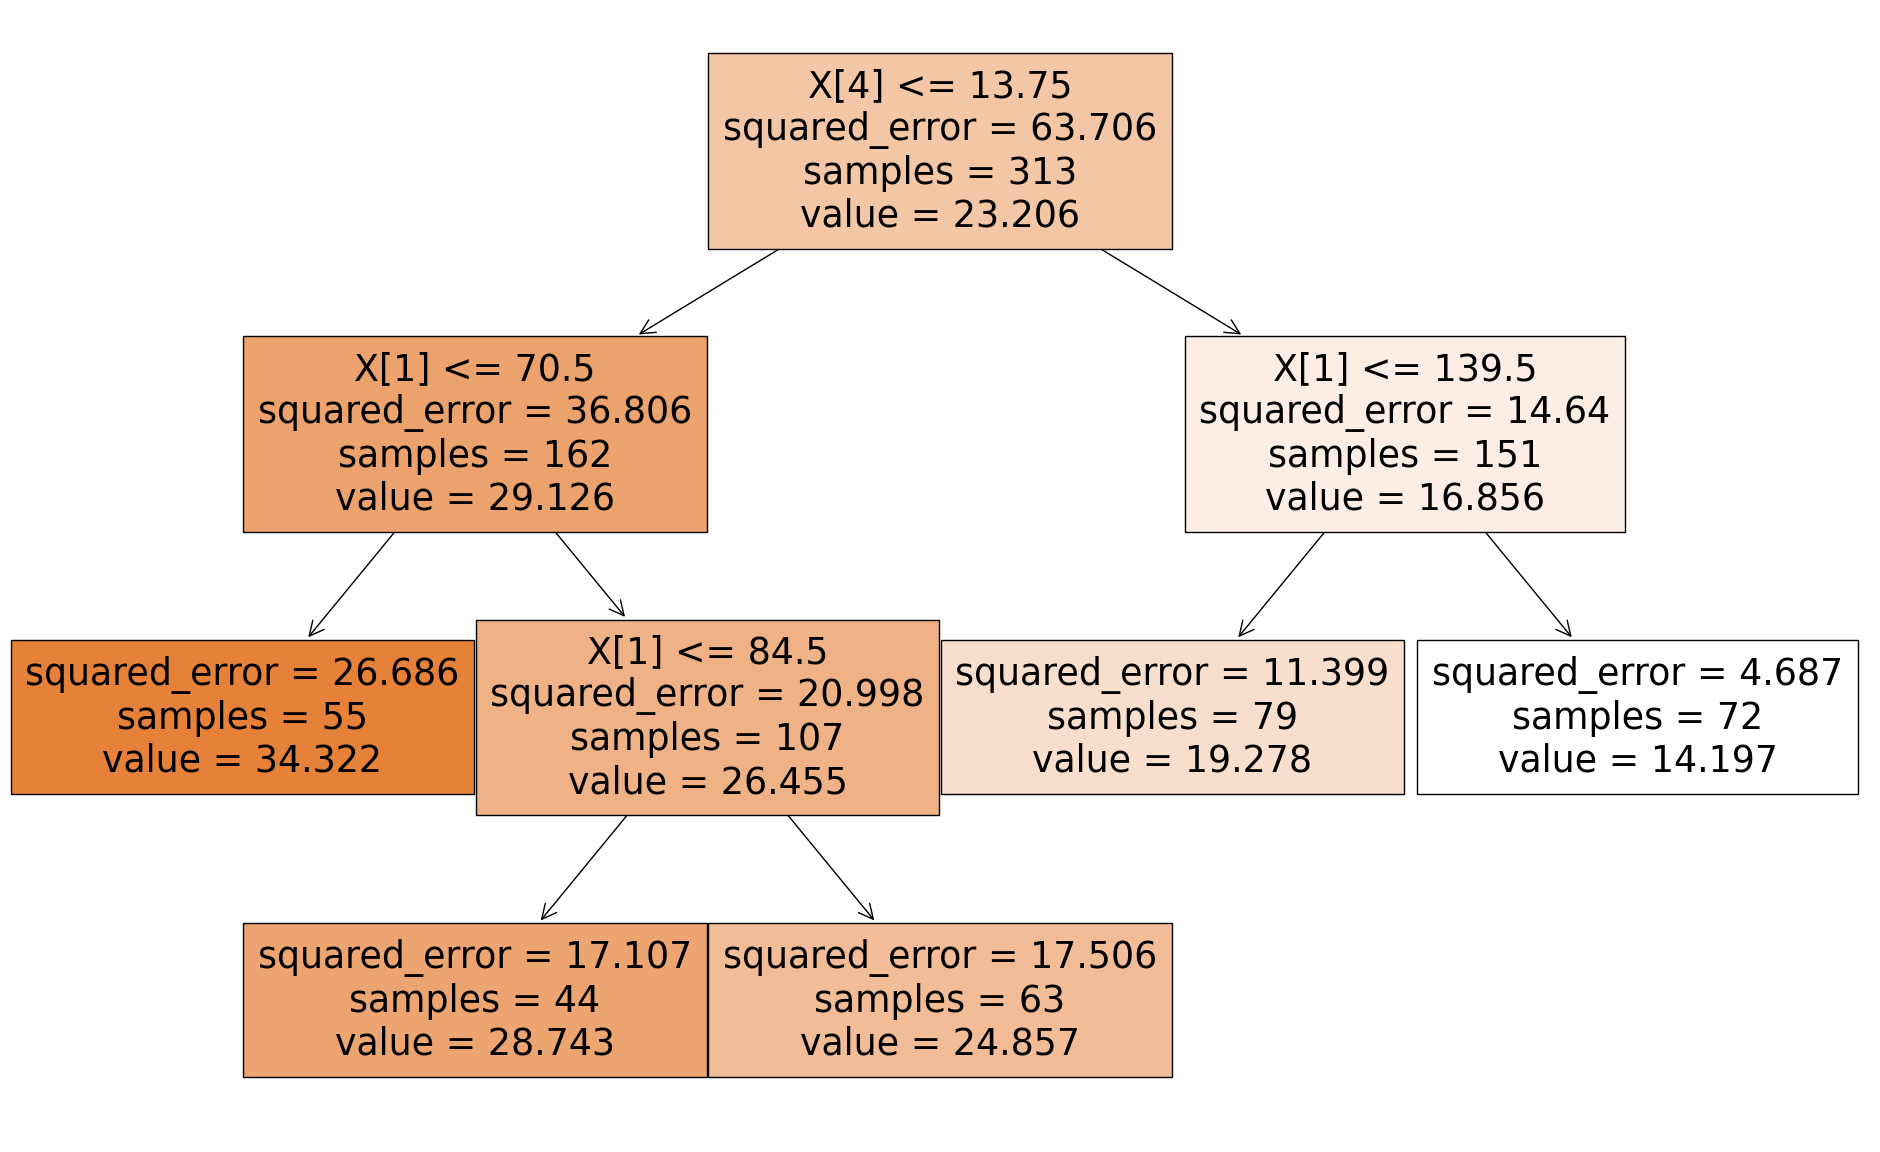

In [21]:
#Plot the regression tree
plt.figure(figsize = (24,15), dpi = 100)
tree.plot_tree(dt,filled=True)
plt.savefig("mpg-regression-tree.pdf",bbox_inches='tight')
plt.show()

### Homework
- Apply the regression tree with a similar process to predict the final year grade (issued at the 3rd period - G3) of students in the Student performance dataset: https://archive.ics.uci.edu/dataset/320/student+performance 
- Report the results on RMSE measure.